# Author:-Harshal Kakade

## Task-3:-Exploratory Data Analysis - Retail

## Problem Statement:-As a business manager, try to find out the weak areas where you can work to make more profit.What all business problems you can derive by exploring the data?


# The Spark Foundation
## Graduate Rotational Internship Program(GRIP) July-2021 Batch
### Data Science and Business Analytics 

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
# head():-displays top five rows of dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# checking shape of dataset
df.shape

(9994, 13)

In [5]:
# checking data types of features
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# checking for missing/null values of dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no missing/null values in dataset

In [8]:
# checking for duplicated rows
df.duplicated().sum()

17

In [9]:
# dropping the duplicated rows
df.drop_duplicates().shape

(9977, 13)

In [10]:
# checking basic statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
# checking correlation
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [12]:
# shows all columns names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
# dropping postal code column/feature 
df=df.drop(['Postal Code'],axis=1)

In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
# checking unique values count of all features
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

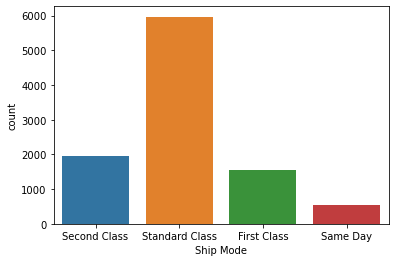

In [16]:
# visualization of ship mode using countplot
sns.countplot(df['Ship Mode'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

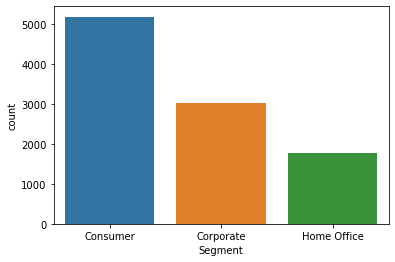

In [17]:
# visualization of segment using countplot
sns.countplot(df['Segment'])

<AxesSubplot:xlabel='Region', ylabel='count'>

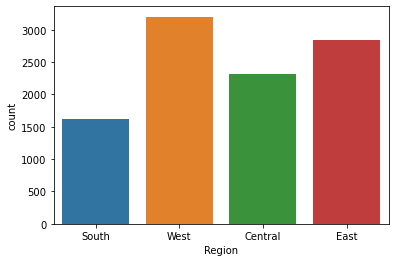

In [18]:
# visualization of region using countplot
sns.countplot(df['Region'])

<AxesSubplot:xlabel='Category', ylabel='count'>

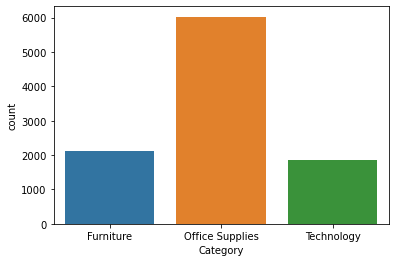

In [19]:
# visualization of category using countplot
sns.countplot(df['Category'])

In [20]:
# checking value counts of sub-category column
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:ylabel='Sub-Category'>

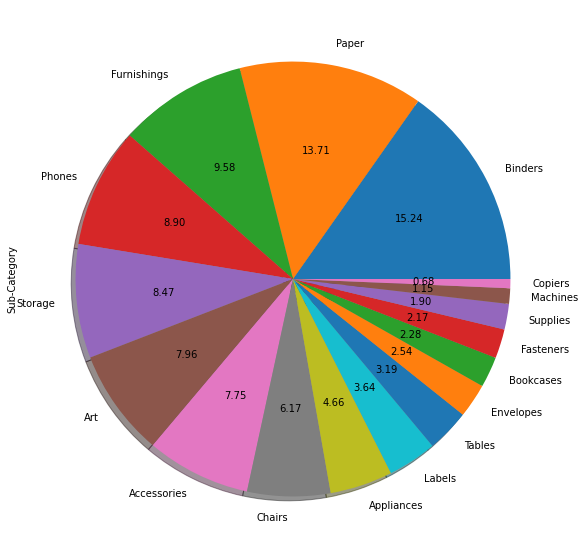

In [21]:
# visualization of sub-category using piechart
plt.figure(figsize=(15,10))
df['Sub-Category'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True)

In sub categories Binders,Paper,Furnishings,Phones and Storage are top 5 selling sub categories and Copiers,Machines,Supplies,Fasterns and Bookcases are very less selling sub categories

In [22]:
pd.crosstab(df['Category'],df['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0


In [23]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

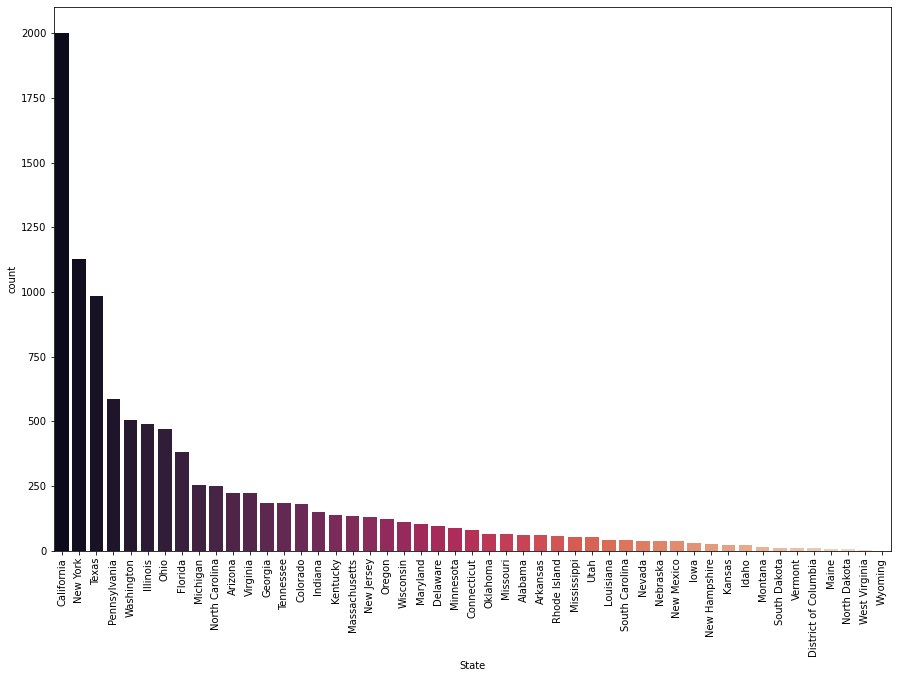

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(df['State'],palette='rocket',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

California,New york,Texas,Pennsylvania and washington are top 5 States Where we have more customers/Buyers whereas wyoming,West virginia,north dakota,Maine,District of Columbia having very less no of customers

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

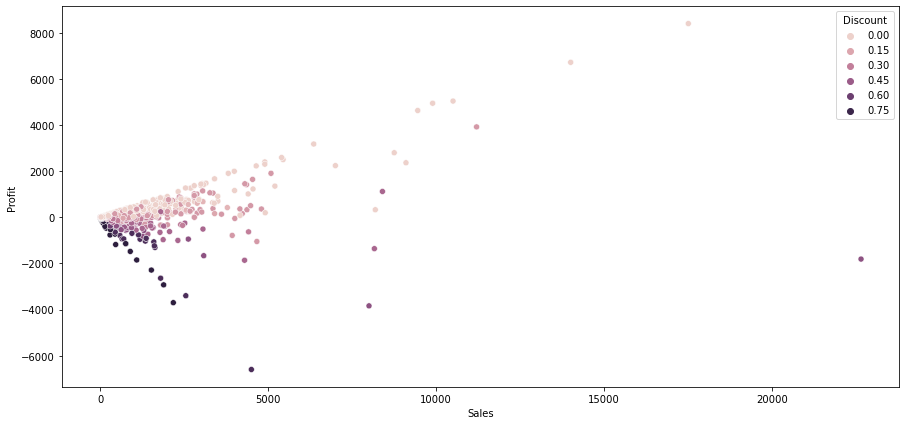

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(df['Sales'],df['Profit'],hue=df['Discount'])

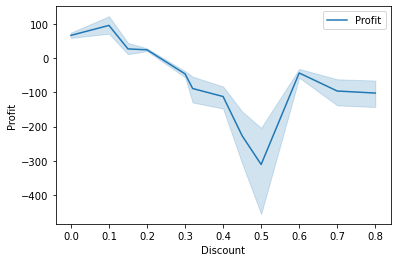

In [26]:
# checking relashionship of discount and profit
sns.lineplot(df['Discount'],df['Profit'],label='Profit')
plt.legend()

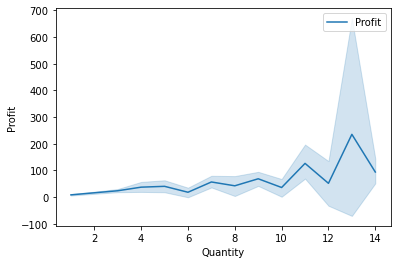

In [27]:
# checking relashionship of quantity and profit
sns.lineplot(df['Quantity'],df['Profit'],label='Profit')
plt.legend()

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

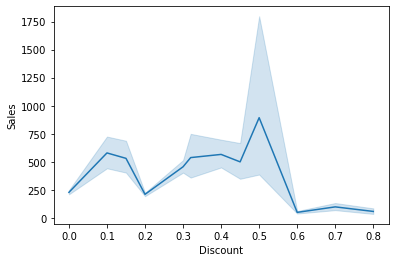

In [28]:
# checking relashionship of discount and sales
sns.lineplot(df['Discount'],df['Sales'])


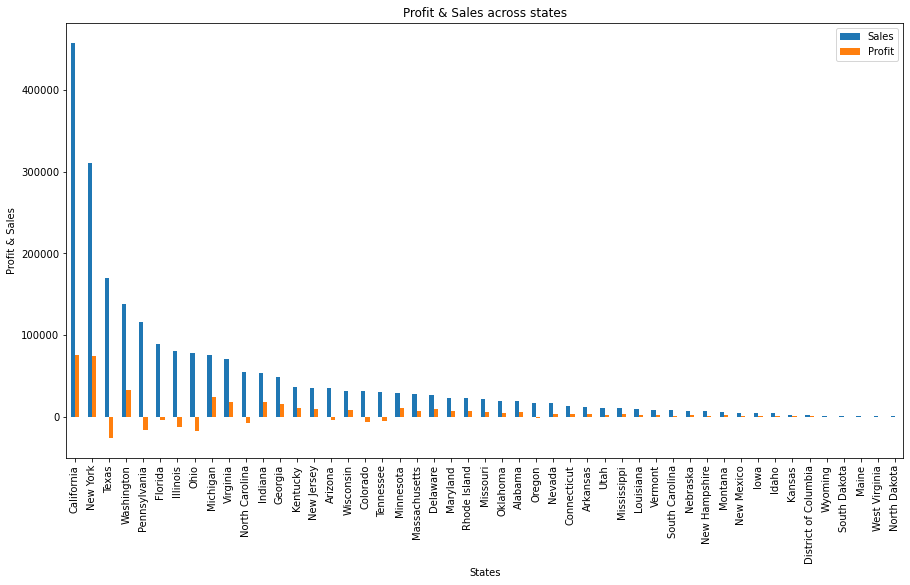

In [29]:
# Groupby States & Sales Vs Profit
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(15,8))
plt.title('Profit & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit & Sales')
plt.show()

texas,pennsylvania,llinois,ohio,florida,north california,arizonna,tennessee,colorado and oregon from these states we are getting huge loss

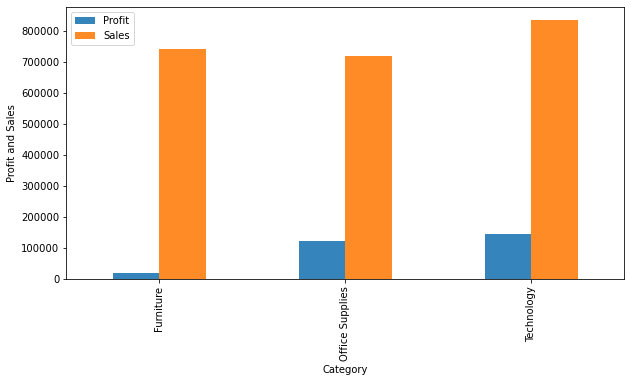

In [30]:
# Groupby Category & Profit Vs Sales
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(alpha=0.9,figsize=(10,5))
plt.ylabel('Profit and Sales')
plt.show()

All the categories having almost equal sell but from technology and office supplies categories we get more profit.

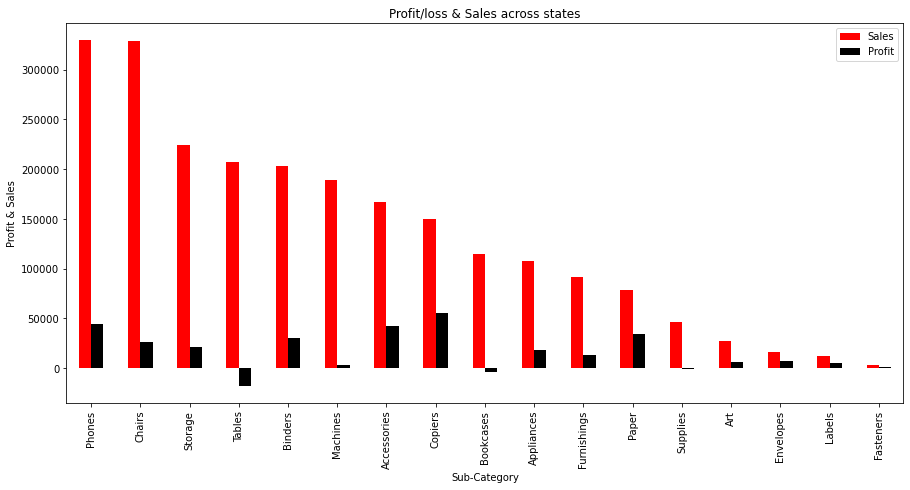

In [31]:
# Groupby Sub-Category & Profit Vs Sales
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','black'],figsize=(15,7))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit & Sales')
plt.show()

1.Sub-category - Phones,Chairs having high sales and fasteners,labels,art,supplies having very less less.

2.from Copiers,paper,accesories has high profit as compare to it's sales.

3.Tables and Bookcases facing some loss

## As a business manager, try to find out the weak areas where you can work to make more profit.

1.Sub-Categories like Supplies, Bookcases, Machines, Tables which have more sales but still in loss.

2.Discount is one more most affecting factor to the profit. We can set a discount in such a way that we will get atleast minimun profit.

3.Furniture category has 2nd highest sales but profit is very low. This is the main area on which business manager will have to work more.

4.Texas,pennsylvania,llinois,ohio,florida,north california,arizonna,tennessee,colorado and oregon from these states we are getting huge loss

5.Wyoming, West Virginia, North Dajota, Maine, District of Columbia are bottom 5 states which have lowest no. of buyers

## What all business problems you can derive by exploring the data?

1.Copiers, Machines, suppliers, Fasteners, Bookcases are 5 bottom most low moving sub-categories.

2.Wyoming, West Virginia, North Dajota, Maine, District of Columbia are bottom 5 states which have lowest no. of buyers.

3.Texas state has highest loss as compare to Sales

4.The Furniture has more sales but profit is very low

5.Tables and Bookcases have facing huge loss